In [2]:
import pandas as pd
df = pd.read_csv('../z20_data/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [3]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [4]:
# 대륙 안에 몇개의 국가가 있는지 1)
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [2]:
# 대륙 안에 몇개의 국가가 있는지 2)
df.groupby('continent')['country'].size()

continent
AF    53
AS    44
EU    45
OC    16
SA    12
Name: country, dtype: int64

In [6]:
# 대륙 간 각 컬럼들의 합
df.groupby('continent').sum()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,,
AF,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,3258,866,862,159.4
AS,AfghanistanBahrainBangladeshBhutanBruneiCambod...,1630,2677,399,95.5
EU,AlbaniaAndorraArmeniaAustriaAzerbaijanBelarusB...,8720,5965,6400,387.8
OC,AustraliaCook IslandsFijiKiribatiMarshall Isla...,1435,935,570,54.1
SA,ArgentinaBoliviaBrazilChileColombiaEcuadorGuya...,2101,1377,749,75.7


In [7]:
# 1개의 컬럼에 대한 sum
df.groupby('continent')['beer_servings'].sum()

continent
AF    3258
AS    1630
EU    8720
OC    1435
SA    2101
Name: beer_servings, dtype: int64

In [8]:
# 대륙 AF에 속하는 국가의 'beer_servings'을 출력
df.groupby('continent')['beer_servings'].sum()['AF']

3258

In [12]:
df[df['continent'] == 'AF'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF


In [13]:
df[df['continent'] == 'AF']['beer_servings'].head()

2      25
4     217
18     34
22    173
26     25
Name: beer_servings, dtype: int64

In [15]:
# 대륙별 평균 wine_servings 출력
df.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [16]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### corr 함수 : 상관관계 함수

In [ ]:
# corr() 
# => 각각의 항목에 대한 상관관계를 수치(0~1)로 나타냄
# => 1에 가까울 수록 상관관계가 높다
# => 상관관계에 따른 원인을 찾아내야 함

In [17]:
df[['beer_servings','wine_servings']].corr(method='pearson')

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [4]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [5]:
# 4개 모두 다 상관관계 행렬 구현
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
df[cols].corr(method='pearson')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [6]:
# 대륙별로 맥주소비량(beer_servings)의 평균, 최소, 최대, 합계
df.groupby('continent')['beer_servings'].agg(['mean','min','max','sum'])

,mean,min,max,sum
continent,,,,
AF,61.471698,0,376,3258
AS,37.045455,0,247,1630
EU,193.777778,0,361,8720
OC,89.687500,0,306,1435
SA,175.083333,93,333,2101


In [14]:
# 맥주소비량(beer_servings)이 가장 높은 대륙은 어떻게 되는지  -> 2가지 함수 사용가능  :  idxmax(), sort_values()
df.groupby('continent')['beer_servings'].sum().idxmax()

'EU'

In [4]:
df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False)
df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index
df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).values

array([8720, 3258, 2101, 1630, 1435], dtype=int64)

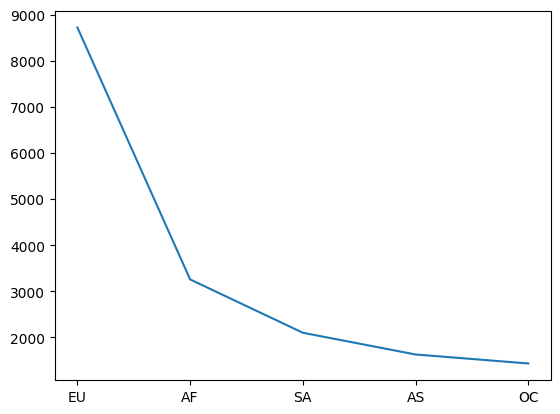

In [6]:
# 막대그래프 대륙별 맥주 소비량 그래프로 구현
import matplotlib.pyplot as plt
x = ['EU', 'AF', 'SA', 'AS', 'OC']
y = [8720, 3258, 2101, 1630, 1435]

plt.plot(x,y)

<BarContainer object of 5 artists>

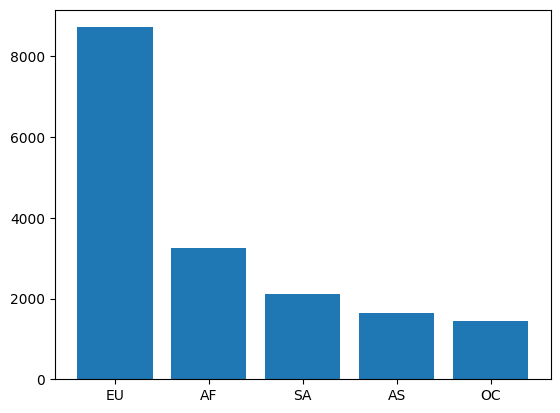

In [7]:
plt.bar(x,y)

In [3]:
df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index

Index(['EU', 'AF', 'SA', 'AS', 'OC'], dtype='object', name='continent')

In [8]:
# AF, EU 맥주 소비량 차이 출력
df.groupby('continent')['beer_servings'].sum()

continent
AF    3258
AS    1630
EU    8720
OC    1435
SA    2101
Name: beer_servings, dtype: int64

In [9]:
8720-3258

5462

In [10]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [17]:
beer_af = df[df['continent']=='AF']['beer_servings'].sum()
beer_eu = df[df['continent']=='EU']['beer_servings'].sum()
beer_eu - beer_af

5462

In [43]:
import pandas as pd
df = pd.read_csv('../z20_data/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [44]:
# 컬럼의 모든 술의 총량을 출력
df['total_servings'] = df['beer_servings'] + df['spirit_servings'] + df['wine_servings'] 
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


<BarContainer object of 20 artists>

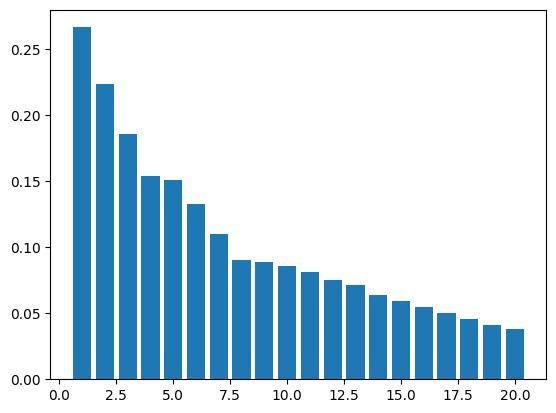

In [46]:
# 술 소비량 대비 알콜 비율이 어느정도 량이 되는지 출력
df['total_litres_of_pure_alcohol']/df['total_servings']

# 'alcohol_rate' 컬럼 추가
df['alcohol_rate'] = df['total_litres_of_pure_alcohol']/df['total_servings']
df

# 국가 alcohol_rate 비율을 가지고 역순정렬로 20개정렬
df.sort_values('alcohol_rate').head(20)
df
df.sort_values('alcohol_rate',ascending=False).head(20)[['country','alcohol_rate']]
# df.loc[df['country'],'alcohol_rate'].head(20).sort_values(ascending=False)

# 막대그래프
df_country = df.sort_values('alcohol_rate',ascending=False).head(20)['country']
df_alcohol_rate = df.sort_values('alcohol_rate',ascending=False).head(20)['alcohol_rate']

# x축을 숫자로
df_country = [i+1 for i in range(len(df_country))]
# i_list = [i+1 for i in range(20)]
# print(i_list)

plt.bar(df_country,df_alcohol_rate )



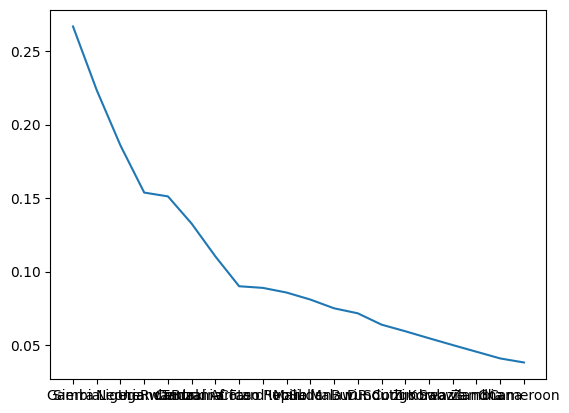